In [4]:
import pandas as pd
import openai
import os
from openai.embeddings_utils import cosine_similarity, get_embedding
from transformers import pipeline
import numpy as np
import tiktoken
openai.api_key = os.getenv('OPENAI_API_KEY')
%matplotlib inline

Provide each label with textual description

In [5]:
labeles_dic={
"E1":"Climate Change. Transition plan, policies, actions, resources and targets relating to climate change. Energy consumption, Scope 1, 2, 3 and total GHG emissions and Greenhouse gass removal. Carbon pricing and financial effects related to climate change ",
"E2":"Pollution. Policies, Actions and Targets related to pollution. Polluition of air, water and soil. Substances of concern and potential financial effects from pollution",
"E3":"Water and marine resources. Policies, Actions and Targets related to water and marine resources. Water consumption. Financial effects relating to water and marine resources",
"E4":"Biodiversity and ecosystems. Transition plan, policies, actions, resources and targets related to biodiversity and ecosystems. Impact to biodiversity and ecosystems. Financial effects related to biodiversity and ecosystems",
"E5":"Resource use and circular economy.Policies, Actions and Targets related to recycling. Resources inflows and Resource outflows. Finantial effects related to Resource use and circular economy",
"S1":"Own workforce. Policies, processes for engagment and action to remidiate negative impact on own workforce. Charactersitics of employees and non-employees. Collective barganing, diversity, adequate wage, social protection, traning and health and worklife balance indicators. Compensation and incident reporting",
"S2":"Workers in the value chain. Policies, targets, processes for engagment and action to remidiate negative impact on Workers in the value chain",
"S3":"Affected communities. Policies, processes for engaging and remidiating negative impact for Affected communities. Action and targets related to affected communities",
"S4":"Consumers and end-users. Policies, processes for engaging and remidiating negative impact for Consumers and end-users. Action and targets related to Consumers and end-users",
"G1":"Business Conduct. Corporate culture and business conduct policies, relationship with suppliers. Prevention and detection of curroption or bribery. Political influence and lobbying. Payment practices "}


In [6]:
# get the label embeddings
labels=list(labeles_dic.values())
label_embeddings = [openai.Embedding.create(input=[i], model='text-embedding-ada-002')['data'][0]['embedding'] for i in labels]
df_data=pd.read_csv('..\\text_data.csv', index_col=0)

<AxesSubplot:>

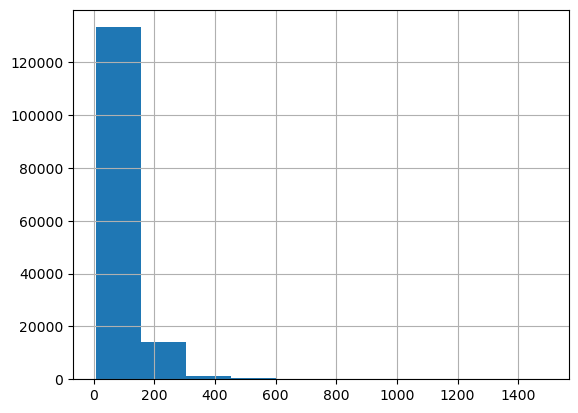

In [7]:
tokenizer = tiktoken.get_encoding("cl100k_base")
df_data['n_tokens'] = df_data.text.apply(lambda x: len(tokenizer.encode(x)))
# Visualize the distribution of the number of tokens per row using a histogram
df_data.n_tokens.hist()

In [8]:
CRSD_Lables=list(labeles_dic.keys())

In [9]:
#
def gpt_results(sim):
    results_list=[]       
    for i in range(0,10):
        results_list.append([CRSD_Lables[i],sim[i]])
    results_list.sort(key = lambda i: i[1],reverse = True)
    return results_list

In [ ]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [16]:
data_embeddings=[]
while len(data_embeddings)< len(df_data):
    i=len(data_embeddings)
    data_embeddings+=[openai.Embedding.create(input = df_data.text.at[i], model='text-embedding-ada-002')['data'][0]['embedding']]
    if i % 1000==0:
        logging.info("Rows done= {a} , {c} % done ".format(a=len(data_embeddings),c=100*len(data_embeddings)/len(df_data) ))

119001    rows done out of 149083      79.8219783610472 % done
120001    rows done out of 149083      80.49274565175104 % done
121001    rows done out of 149083      81.16351294245487 % done
122001    rows done out of 149083      81.83428023315871 % done
123001    rows done out of 149083      82.50504752386256 % done
124001    rows done out of 149083      83.17581481456638 % done
125001    rows done out of 149083      83.84658210527022 % done
126001    rows done out of 149083      84.51734939597405 % done
127001    rows done out of 149083      85.1881166866779 % done
128001    rows done out of 149083      85.85888397738172 % done
129001    rows done out of 149083      86.52965126808556 % done
130001    rows done out of 149083      87.2004185587894 % done
131001    rows done out of 149083      87.87118584949324 % done
132001    rows done out of 149083      88.54195314019707 % done
133001    rows done out of 149083      89.2127204309009 % done
134001    rows done out of 149083      89.88

In [22]:
df_data["embeddings"]=data_embeddings
df_data.to_csv("..\\data_with_embeddings.csv")